# Estatísticas Gerais do Desafio de Filmes 2025

## 0. Imports

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter
from wordcloud import WordCloud

# Configurações visuais
plt.style.use('default')
sns.set_theme(style="whitegrid")
sns.set_palette("viridis")

# Carregar dados
df = pd.read_csv('stats.csv')

# Pré-processamento básico
df['Década'] = (df['Ano'] // 10) * 10
participantes_excluidos = ['aNobree', 'Tunim73']
df_filtrado = df[~df['Assistido por'].isin(participantes_excluidos)].copy()

# Criar DataFrame único por filme (para análises gerais)
df_unicos = df.drop_duplicates(subset=['Título original']).copy()
df_unicos_filtrado = df_unicos[~df_unicos['Assistido por'].isin(participantes_excluidos)]

print("Configuração inicial concluída!")
print(f"Total de registros: {len(df)}")
print(f"Filmes únicos: {len(df_unicos)}")
print(f"Participantes ativos: {len(df_filtrado['Assistido por'].unique())}")

Configuração inicial concluída!
Total de registros: 307
Filmes únicos: 257
Participantes ativos: 10


In [16]:
def plot_barra_horizontal(dados, x, y, titulo, xlabel, ylabel, mostrar_valores=True):
    """Cria gráfico de barras horizontais padronizado"""
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(data=dados, x=x, y=y, hue=y, dodge=False, legend=False)
    
    if mostrar_valores:
        for i, v in enumerate(dados[x]):
            ax.text(v + 0.1, i, str(v), va='center')
    
    plt.title(titulo, pad=20, fontsize=14)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(axis='x', linestyle='--', alpha=0.3)
    sns.despine(left=True, bottom=True)
    plt.tight_layout()
    plt.show()

def analisar_decada_participante(df, participante):
    """Gera análise de década preferida para um participante"""
    filmes = df[df['Assistido por'] == participante]
    filmes_unicos = filmes.drop_duplicates(subset=['Título original'])
    
    if len(filmes_unicos) == 0:
        return
    
    decada_top = filmes_unicos['Década'].value_counts().idxmax()
    filmes_decada = filmes_unicos[filmes_unicos['Década'] == decada_top].sort_values('Ano')
    
    print(f"\n{participante}:")
    print(f"   • Visualizações: {len(filmes)}")
    print(f"   • Filmes únicos: {len(filmes_unicos)}")
    print(f"   • Tempo total: {filmes['Duração'].sum()} min")
    print(f"   • Década preferida: {decada_top}s ({len(filmes_decada)} filmes)")
    
    return filmes_decada

print("Funções utilitárias definidas!")

Funções utilitárias definidas!


## 1. Análise de Tempo Assistido

### 1.2 Duração dos filmes

════════════════════════════════════════════════════════════
            ANÁLISE DE DURAÇÃO DOS FILMES ÚNICOS            
════════════════════════════════════════════════════════════

FILME MAIS LONGO: E o Vento Levou (233 min)
FILME MAIS CURTO: Moonless Dawn (60 min)

Estatísticas:
   • Total: 257 filmes únicos
   • Média: 110.21 min
   • Mediana: 105.0 min
   • Moda: 94 min


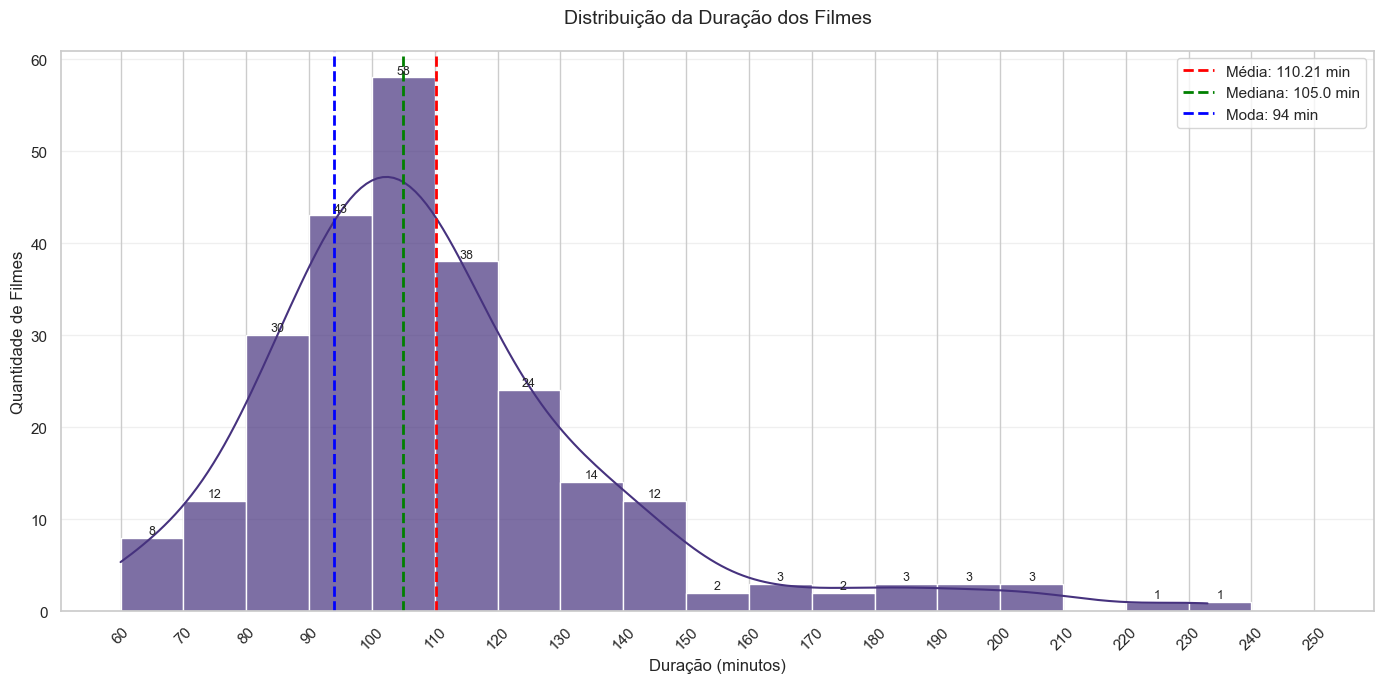


════════════════════════════════════════════════════════════
             DISTRIBUIÇÃO POR FAIXA DE DURAÇÃO              
════════════════════════════════════════════════════════════

Top faixas de duração:
   100-109min: 58 filmes
   90-99min: 43 filmes
   110-119min: 38 filmes
   80-89min: 30 filmes
   120-129min: 24 filmes

Faixa mais comum: 100-109min (58 filmes)


In [17]:
# Usar df_unicos para análise de duração
filme_mais_longo = df_unicos.loc[df_unicos['Duração'].idxmax()]
filme_mais_curto = df_unicos.loc[df_unicos['Duração'].idxmin()]

media_duracao = df_unicos['Duração'].mean()
mediana_duracao = df_unicos['Duração'].median()
moda_duracao = df_unicos['Duração'].mode()[0]

print("═" * 60)
print("ANÁLISE DE DURAÇÃO DOS FILMES ÚNICOS".center(60))
print("═" * 60)
print(f"\nFILME MAIS LONGO: {filme_mais_longo['Filme']} ({filme_mais_longo['Duração']} min)")
print(f"FILME MAIS CURTO: {filme_mais_curto['Filme']} ({filme_mais_curto['Duração']} min)")
print(f"\nEstatísticas:")
print(f"   • Total: {len(df_unicos)} filmes únicos")
print(f"   • Média: {media_duracao:.2f} min")
print(f"   • Mediana: {mediana_duracao} min")
print(f"   • Moda: {moda_duracao} min")

# BINS FIXOS de 10 em 10 minutos
min_duracao = 60
max_duracao = df_unicos['Duração'].max()
bins = list(range(min_duracao, max_duracao + 20, 10))

# Visualização com bins fixos
plt.figure(figsize=(14, 7))
ax = sns.histplot(df_unicos['Duração'], bins=bins, kde=True, alpha=0.7)

# Adicionar linhas de referência
plt.axvline(media_duracao, color='red', linestyle='dashed', linewidth=2, label=f'Média: {media_duracao:.2f} min')
plt.axvline(mediana_duracao, color='green', linestyle='dashed', linewidth=2, label=f'Mediana: {mediana_duracao} min')
plt.axvline(moda_duracao, color='blue', linestyle='dashed', linewidth=2, label=f'Moda: {moda_duracao} min')

# Adicionar contagens nas barras
for rect in ax.patches:
    height = rect.get_height()
    if height > 0:
        ax.text(rect.get_x() + rect.get_width() / 2, height + 0.1,
                f'{int(height)}', ha='center', va='bottom', fontsize=9)

plt.title('Distribuição da Duração dos Filmes', fontsize=14, pad=20)
plt.xlabel('Duração (minutos)', fontsize=12)
plt.ylabel('Quantidade de Filmes', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3, axis='y')
plt.xticks(bins, rotation=45)
plt.tight_layout()
plt.show()

# Análise por faixa de duração
print("\n" + "═" * 60)
print("DISTRIBUIÇÃO POR FAIXA DE DURAÇÃO".center(60))
print("═" * 60)

faixas = []
for i in range(len(bins) - 1):
    faixa_min = bins[i]
    faixa_max = bins[i + 1]
    count = len(df_unicos[(df_unicos['Duração'] >= faixa_min) & (df_unicos['Duração'] < faixa_max)])
    if count > 0:
        faixas.append((f"{faixa_min}-{faixa_max-1}min", count))

faixas.sort(key=lambda x: x[1], reverse=True)

print("\nTop faixas de duração:")
for faixa, count in faixas[:5]:
    print(f"   {faixa}: {count} filmes")

print(f"\nFaixa mais comum: {faixas[0][0]} ({faixas[0][1]} filmes)")

### 1.2 Tempo assistido por pessoa

════════════════════════════════════════════════════════════
              TEMPO TOTAL ASSISTIDO POR PESSOA              
════════════════════════════════════════════════════════════
Inclui múltiplas visualizações do mesmo filme



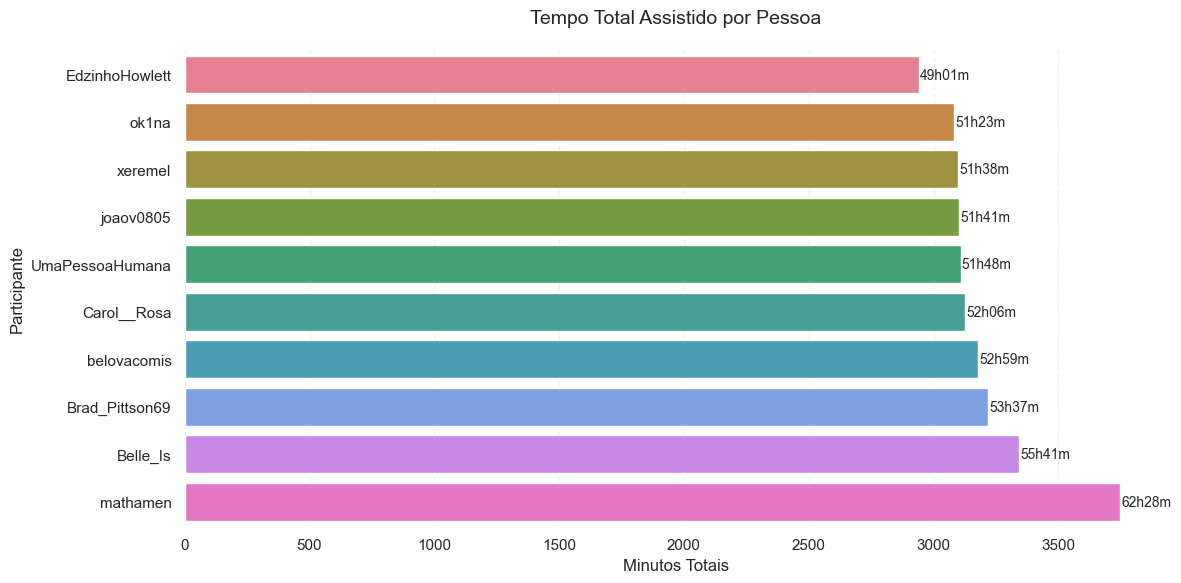

Resumo do tempo assistido:
   EdzinhoHowlett: 49h01m (2941 min)
   ok1na: 51h23m (3083 min)
   xeremel: 51h38m (3098 min)
   joaov0805: 51h41m (3101 min)
   UmaPessoaHumana: 51h48m (3108 min)
   Carol__Rosa: 52h06m (3126 min)
   belovacomis: 52h59m (3179 min)
   Brad_Pittson69: 53h37m (3217 min)
   Belle_Is: 55h41m (3341 min)
   mathamen: 62h28m (3748 min)


In [18]:
# Calcular tempo total por pessoa (todas as visualizações)
tempo_total = df_filtrado.groupby('Assistido por')['Duração'].sum().sort_values()
tempo_df = pd.DataFrame({'Pessoa': tempo_total.index, 'Minutos': tempo_total.values})

# Converter para formato horas:minutos
tempo_df['Horas'] = tempo_df['Minutos'] // 60
tempo_df['Minutos_resto'] = tempo_df['Minutos'] % 60
tempo_df['Tempo_Formatado'] = tempo_df.apply(lambda x: f"{x['Horas']}h{x['Minutos_resto']:02d}m", axis=1)

print("═" * 60)
print("TEMPO TOTAL ASSISTIDO POR PESSOA".center(60))
print("═" * 60)
print("Inclui múltiplas visualizações do mesmo filme\n")

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=tempo_df, x='Minutos', y='Pessoa', hue='Pessoa', dodge=False, legend=False)

# Adicionar valores formatados
for i, (idx, row) in enumerate(tempo_df.iterrows()):
    ax.text(row['Minutos'] + 5, i, row['Tempo_Formatado'], va='center', fontsize=10)

plt.title('Tempo Total Assistido por Pessoa', fontsize=14, pad=20)
plt.xlabel('Minutos Totais', fontsize=12)
plt.ylabel('Participante', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.3)
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

# Mostrar tabela resumo
print("Resumo do tempo assistido:")
for _, row in tempo_df.iterrows():
    print(f"   {row['Pessoa']}: {row['Tempo_Formatado']} ({row['Minutos']} min)")

## 2. Gêneros mais vistos

### 2.1 Visão Geral dos gêneros

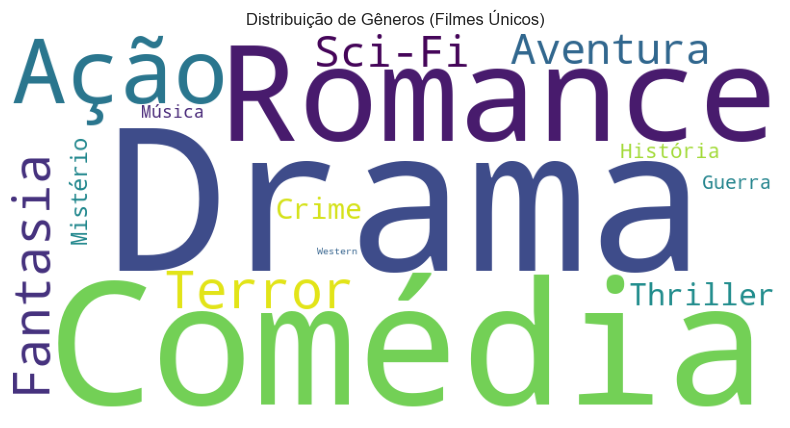

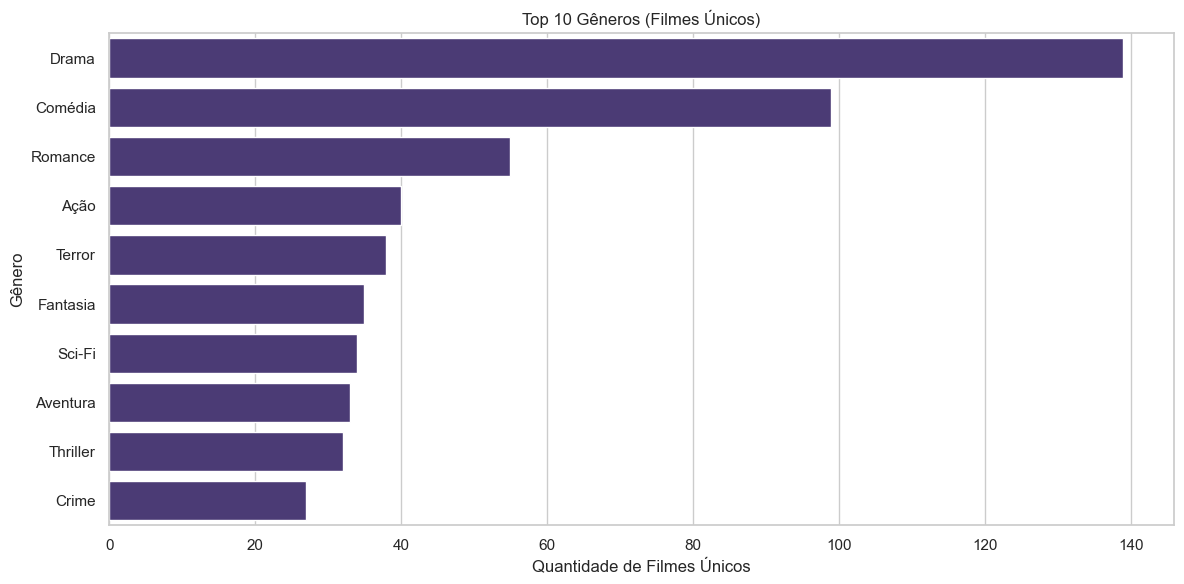

In [19]:
# Para gêneros, usamos filmes únicos para não distorcer a análise
df_generos = df_unicos.assign(Gênero=df_unicos['Gênero'].str.split(', ')).explode('Gênero')

# WordCloud com filmes únicos
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(
    df_generos['Gênero'].value_counts().to_dict())

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Distribuição de Gêneros (Filmes Únicos)')
plt.show()

# Top gêneros
top_generos = df_generos['Gênero'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_generos.values, y=top_generos.index)
plt.title('Top 10 Gêneros (Filmes Únicos)')
plt.xlabel('Quantidade de Filmes Únicos')
plt.ylabel('Gênero')
plt.tight_layout()
plt.show()

### 2.2 Gêneros vistos por cada participante

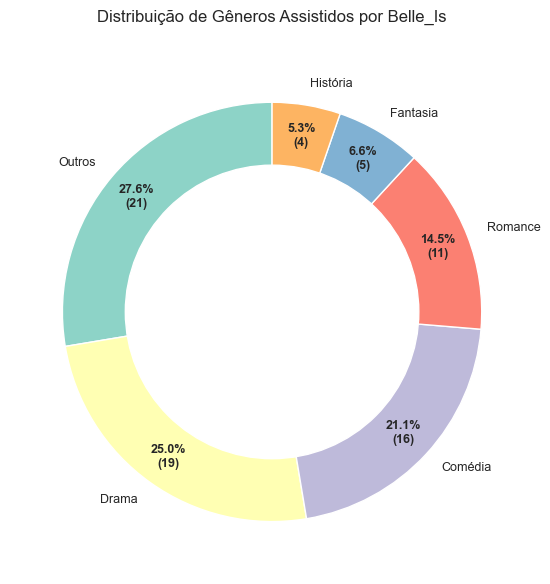


Gêneros únicos assistidos por Belle_Is:
Aventura, Ação, Comédia, Crime, Drama, Fantasia, Guerra, História, Mistério, Música, Romance, Terror, Thriller

Contagem detalhada:
- Drama: 19 filmes
- Comédia: 16 filmes
- Romance: 11 filmes
- Fantasia: 5 filmes
- História: 4 filmes
- Crime: 4 filmes
- Thriller: 4 filmes
- Aventura: 3 filmes
- Música: 3 filmes
- Guerra: 2 filmes
- Ação: 2 filmes
- Mistério: 2 filmes
- Terror: 1 filme




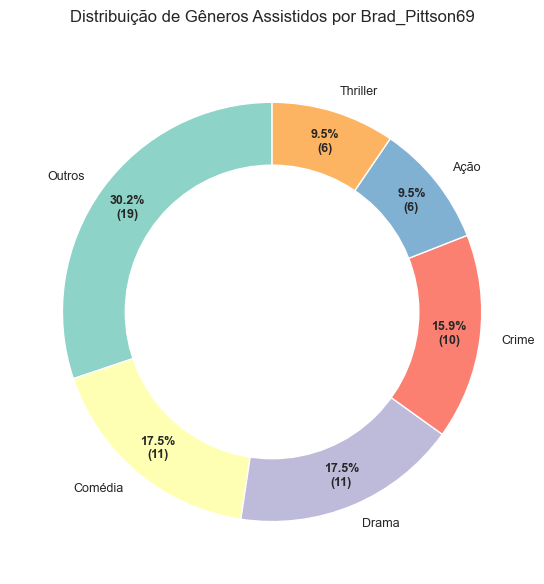


Gêneros únicos assistidos por Brad_Pittson69:
Aventura, Ação, Comédia, Crime, Drama, Fantasia, História, Mistério, Música, Romance, Sci-Fi, Terror, Thriller

Contagem detalhada:
- Comédia: 11 filmes
- Drama: 11 filmes
- Crime: 10 filmes
- Ação: 6 filmes
- Thriller: 6 filmes
- Terror: 5 filmes
- Fantasia: 5 filmes
- Romance: 3 filmes
- Aventura: 2 filmes
- Música: 1 filme
- Mistério: 1 filme
- Sci-Fi: 1 filme
- História: 1 filme




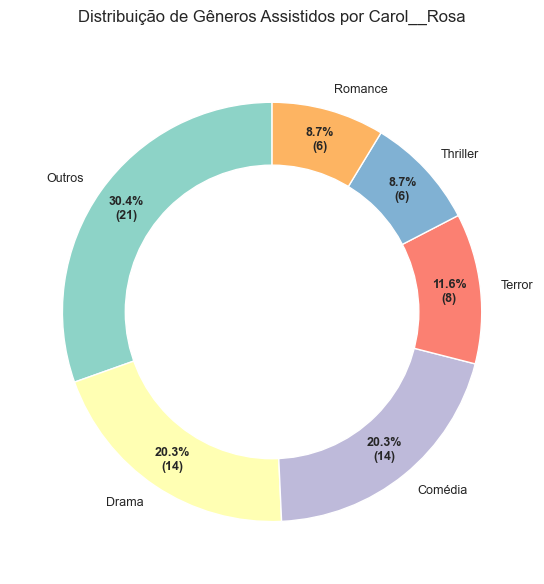


Gêneros únicos assistidos por Carol__Rosa:
Aventura, Ação, Comédia, Crime, Drama, Fantasia, Guerra, História, Mistério, Romance, Sci-Fi, Terror, Thriller

Contagem detalhada:
- Drama: 14 filmes
- Comédia: 14 filmes
- Terror: 8 filmes
- Thriller: 6 filmes
- Romance: 6 filmes
- Fantasia: 5 filmes
- Mistério: 4 filmes
- Sci-Fi: 4 filmes
- Aventura: 2 filmes
- História: 2 filmes
- Ação: 2 filmes
- Crime: 1 filme
- Guerra: 1 filme




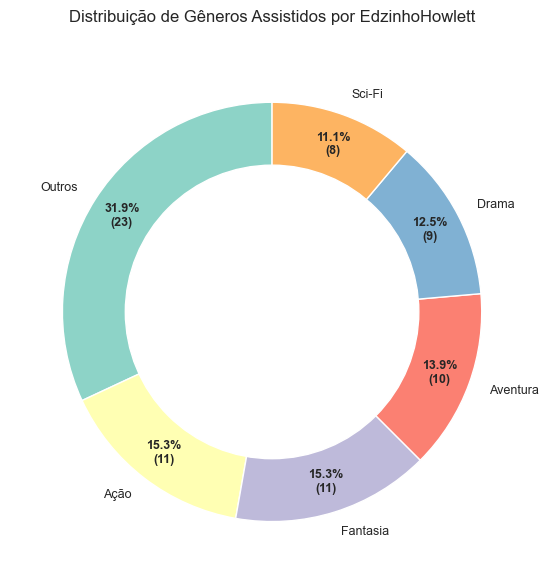


Gêneros únicos assistidos por EdzinhoHowlett:
Aventura, Ação, Comédia, Crime, Drama, Fantasia, História, Música, Romance, Sci-Fi, Terror

Contagem detalhada:
- Ação: 11 filmes
- Fantasia: 11 filmes
- Aventura: 10 filmes
- Drama: 9 filmes
- Sci-Fi: 8 filmes
- Romance: 7 filmes
- Comédia: 6 filmes
- Terror: 3 filmes
- Crime: 3 filmes
- Música: 2 filmes
- História: 2 filmes




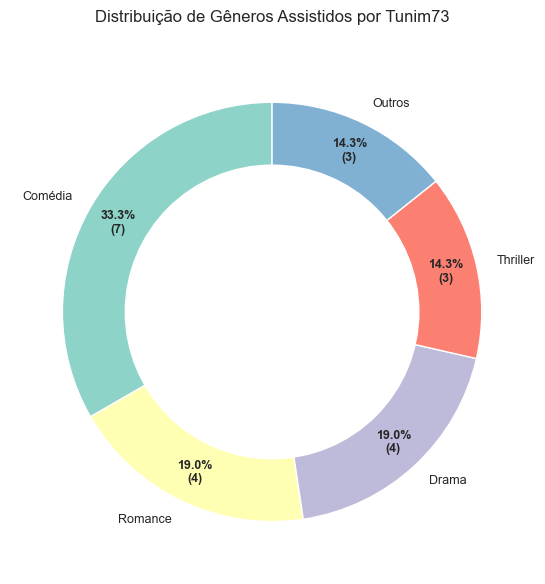


Gêneros únicos assistidos por Tunim73:
Comédia, Crime, Drama, Mistério, Romance, Terror, Thriller

Contagem detalhada:
- Comédia: 7 filmes
- Romance: 4 filmes
- Drama: 4 filmes
- Thriller: 3 filmes
- Crime: 1 filme
- Terror: 1 filme
- Mistério: 1 filme




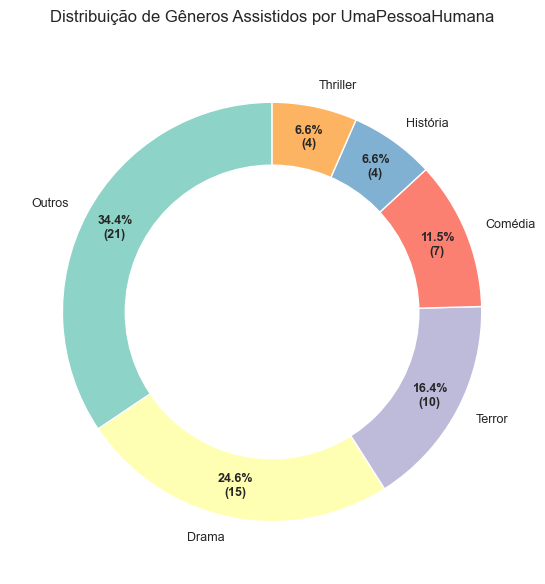


Gêneros únicos assistidos por UmaPessoaHumana:
Aventura, Ação, Comédia, Crime, Drama, Fantasia, Guerra, História, Mistério, Romance, Sci-Fi, Terror, Thriller

Contagem detalhada:
- Drama: 15 filmes
- Terror: 10 filmes
- Comédia: 7 filmes
- História: 4 filmes
- Thriller: 4 filmes
- Guerra: 3 filmes
- Mistério: 3 filmes
- Sci-Fi: 3 filmes
- Romance: 3 filmes
- Fantasia: 3 filmes
- Crime: 2 filmes
- Ação: 2 filmes
- Aventura: 2 filmes




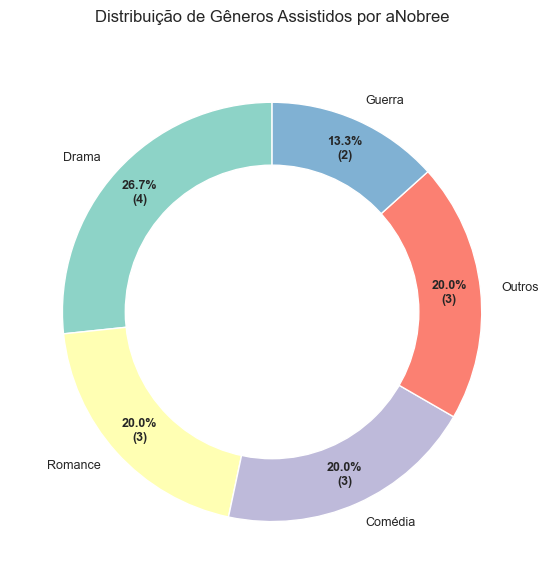


Gêneros únicos assistidos por aNobree:
Aventura, Comédia, Drama, Guerra, Romance, Sci-Fi, Terror

Contagem detalhada:
- Drama: 4 filmes
- Romance: 3 filmes
- Comédia: 3 filmes
- Guerra: 2 filmes
- Aventura: 1 filme
- Terror: 1 filme
- Sci-Fi: 1 filme




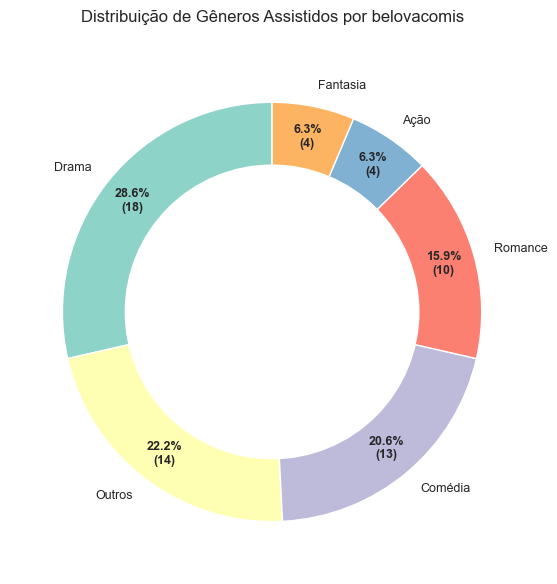


Gêneros únicos assistidos por belovacomis:
Aventura, Ação, Comédia, Crime, Drama, Fantasia, História, Mistério, Música, Romance, Sci-Fi, Terror, Thriller

Contagem detalhada:
- Drama: 18 filmes
- Comédia: 13 filmes
- Romance: 10 filmes
- Ação: 4 filmes
- Fantasia: 4 filmes
- Terror: 3 filmes
- Sci-Fi: 2 filmes
- História: 2 filmes
- Aventura: 2 filmes
- Música: 2 filmes
- Thriller: 1 filme
- Mistério: 1 filme
- Crime: 1 filme




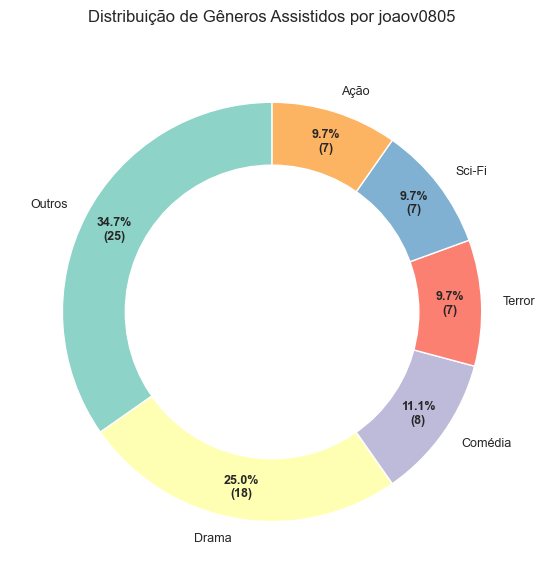


Gêneros únicos assistidos por joaov0805:
Aventura, Ação, Comédia, Crime, Drama, Fantasia, Guerra, Mistério, Música, Romance, Sci-Fi, Terror, Thriller, Western

Contagem detalhada:
- Drama: 18 filmes
- Comédia: 8 filmes
- Terror: 7 filmes
- Sci-Fi: 7 filmes
- Ação: 7 filmes
- Thriller: 6 filmes
- Aventura: 5 filmes
- Romance: 4 filmes
- Fantasia: 4 filmes
- Crime: 2 filmes
- Western: 1 filme
- Mistério: 1 filme
- Guerra: 1 filme
- Música: 1 filme




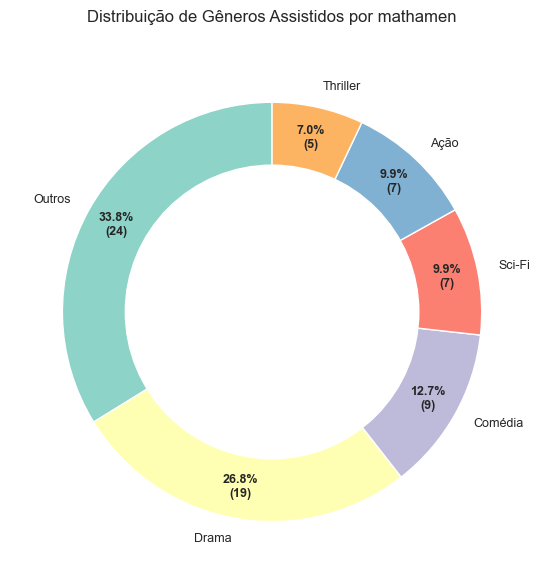


Gêneros únicos assistidos por mathamen:
Aventura, Ação, Comédia, Crime, Drama, Fantasia, Guerra, História, Mistério, Romance, Sci-Fi, Terror, Thriller

Contagem detalhada:
- Drama: 19 filmes
- Comédia: 9 filmes
- Sci-Fi: 7 filmes
- Ação: 7 filmes
- Thriller: 5 filmes
- Aventura: 5 filmes
- Crime: 5 filmes
- Fantasia: 4 filmes
- Guerra: 3 filmes
- Terror: 2 filmes
- História: 2 filmes
- Mistério: 2 filmes
- Romance: 1 filme




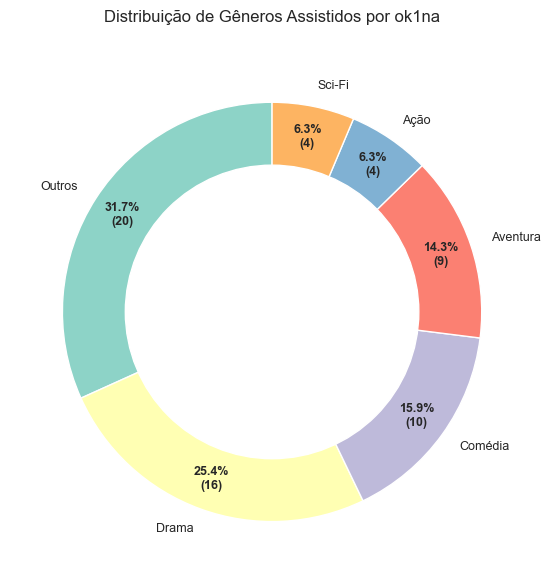


Gêneros únicos assistidos por ok1na:
Aventura, Ação, Comédia, Crime, Drama, Fantasia, Guerra, História, Mistério, Música, Romance, Sci-Fi, Terror, Thriller

Contagem detalhada:
- Drama: 16 filmes
- Comédia: 10 filmes
- Aventura: 9 filmes
- Ação: 4 filmes
- Sci-Fi: 4 filmes
- Fantasia: 4 filmes
- Romance: 3 filmes
- Terror: 3 filmes
- Guerra: 3 filmes
- Mistério: 2 filmes
- História: 2 filmes
- Crime: 1 filme
- Thriller: 1 filme
- Música: 1 filme




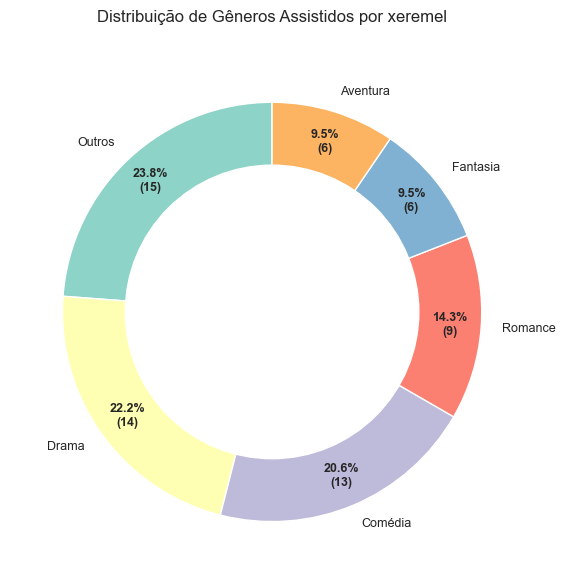


Gêneros únicos assistidos por xeremel:
Aventura, Ação, Comédia, Drama, Fantasia, Mistério, Música, Romance, Sci-Fi, Terror

Contagem detalhada:
- Drama: 14 filmes
- Comédia: 13 filmes
- Romance: 9 filmes
- Fantasia: 6 filmes
- Aventura: 6 filmes
- Música: 4 filmes
- Ação: 4 filmes
- Sci-Fi: 3 filmes
- Terror: 2 filmes
- Mistério: 2 filmes




<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

In [20]:
# Expandir gêneros (separados por vírgula) em linhas individuais
df_expandido = df.assign(Gênero=df['Gênero'].str.split(', ')).explode('Gênero')

# Agrupar por participante e contar gêneros
generos_por_participante = df_expandido.groupby('Assistido por')['Gênero'].apply(list)

## --- Função para Plotar Gráfico de Gêneros por Participante ---
def plot_generos_participante(participante, generos):
    # Contar ocorrências de cada gênero
    contagem = Counter(generos)
    generos_top = [g[0] for g in contagem.most_common(5) if g[1] > 1]  # Top 5 gêneros
    outros = [g for g in contagem if g not in generos_top]
    
    # Preparar dados para o gráfico
    dados = {}
    for g in generos_top:
        dados[g] = contagem[g]
    if outros:
        dados['Outros'] = sum(contagem[g] for g in outros)
    
    # Ordenar do maior para o menor
    dados = dict(sorted(dados.items(), key=lambda item: item[1], reverse=True))
    
    # Criar gráfico de pizza
    fig, ax = plt.subplots(figsize=(10, 6))
    wedges, texts, autotexts = ax.pie(
        dados.values(),
        labels=dados.keys(),
        autopct=lambda p: f'{p:.1f}%\n({int(round(p/100.*sum(dados.values())))})',
        startangle=90,
        colors=sns.color_palette("Set3"),
        textprops={'fontsize': 9},
        pctdistance=0.85
    )
    
    # Melhorar legibilidade
    plt.setp(autotexts, size=9, weight="bold")
    ax.set_title(f'Distribuição de Gêneros Assistidos por {participante}', 
                 pad=20, fontsize=12)
    
    # Adicionar círculo central para estilo 'donut'
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    fig.gca().add_artist(centre_circle)
    
    plt.tight_layout()
    plt.show()
    
    # Listar gêneros únicos (para referência)
    print(f"\nGêneros únicos assistidos por {participante}:")
    print(", ".join(sorted(contagem.keys())))
    print(f"\nContagem detalhada:")
    for genero, qtd in contagem.most_common():
        print(f"- {genero}: {qtd} filme{'s' if qtd > 1 else ''}")
    print("\n" + "="*60 + "\n")

## --- Gerar Gráficos para Cada Participante ---
for participante, generos in generos_por_participante.items():
    plot_generos_participante(participante, generos)

## --- Gráfico de Gêneros Mais Populares (Todos Participantes) ---
plt.figure(figsize=(12, 6))

In [21]:
# Para análise por participante, mantemos todos os registros
print("═" * 60)
print("ESTATÍSTICAS POR PARTICIPANTE".center(60))
print("═" * 60)

for participante in df_filtrado['Assistido por'].unique():
    filmes_participante = df_filtrado[df_filtrado['Assistido por'] == participante]
    filmes_unicos = filmes_participante.drop_duplicates(subset=['Título original'])
    
    print(f"\n🎬 {participante}:")
    print(f"   • Total de visualizações: {len(filmes_participante)}")
    print(f"   • Filmes únicos assistidos: {len(filmes_unicos)}")
    print(f"   • Tempo total: {filmes_participante['Duração'].sum()} minutos")
    
    if len(filmes_unicos) > 0:
        decada_top = filmes_unicos['Década'].value_counts().idxmax()
        print(f"   • Década preferida: {decada_top}s")

════════════════════════════════════════════════════════════
               ESTATÍSTICAS POR PARTICIPANTE                
════════════════════════════════════════════════════════════

🎬 ok1na:
   • Total de visualizações: 29
   • Filmes únicos assistidos: 29
   • Tempo total: 3083 minutos
   • Década preferida: 2020s

🎬 EdzinhoHowlett:
   • Total de visualizações: 29
   • Filmes únicos assistidos: 29
   • Tempo total: 2941 minutos
   • Década preferida: 2020s

🎬 UmaPessoaHumana:
   • Total de visualizações: 29
   • Filmes únicos assistidos: 29
   • Tempo total: 3108 minutos
   • Década preferida: 1960s

🎬 belovacomis:
   • Total de visualizações: 29
   • Filmes únicos assistidos: 29
   • Tempo total: 3179 minutos
   • Década preferida: 2020s

🎬 mathamen:
   • Total de visualizações: 29
   • Filmes únicos assistidos: 29
   • Tempo total: 3748 minutos
   • Década preferida: 2000s

🎬 joaov0805:
   • Total de visualizações: 29
   • Filmes únicos assistidos: 29
   • Tempo total: 3101 minuto

## 3. Distribuição de Décadas

In [22]:
filme_mais_antigo = df.loc[df['Ano'].idxmin()]
ano_mais_novo = df['Ano'].max()
filmes_mais_novos = df[df['Ano'] == ano_mais_novo]

media_ano = df['Ano'].mean()
mediana_ano = df['Ano'].median()
moda_ano = df['Ano'].mode()[0]

print(f"Filme mais antigo: {filme_mais_antigo['Filme']} ({filme_mais_antigo['Ano']})")
print(f"Filmes mais novos ({ano_mais_novo}):")
for idx, filme in filmes_mais_novos.iterrows():
    print(f"  - {filme['Filme']} ({filme['País']})")
print(f"Média dos anos: {media_ano:.2f}")
print(f"Mediana dos anos: {mediana_ano}")
print(f"Moda dos anos: {moda_ano}")

Filme mais antigo: O Inferno (1911)
Filmes mais novos (2025):
  - Guerreiras do K-Pop (EUA)
  - Quarteto Fantástico: Primeiros Passos (EUA)
  - Superman (EUA)
  - Materialistas (EUA)
  - Quarteto Fantástico: Primeiros Passos (EUA)
  - Guerreiras do K-Pop (EUA)
  - Premonição 6: Laços de Sangue (EUA)
  - Premonição 6: Laços de Sangue (EUA)
  - Quarteto Fantástico: Primeiros Passos (EUA)
  - Separados pelas Estrelas (Coreia do Sul)
  - Jurassic World: Recomeço (EUA)
  - Sorry, Baby (EUA)
  - A Hora do Mal (EUA)
  - Mickey 17 (EUA)
  - Smurfs (EUA)
  - Guerra (EUA)
  - Ne Zha 2 (China)
  - Materialistas (EUA)
  - Mickey 17 (EUA)
  - Guerreiras do K-Pop (EUA)
  - A Hora do Mal (EUA)
  - Pecadores (EUA)
  - Um Dia Daqueles (EUA)
  - Ne Zha 2 (China)
  - Pecadores (EUA)
  - Guerreiras do K-Pop (EUA)
Média dos anos: 2001.79
Mediana dos anos: 2010.0
Moda dos anos: 2025


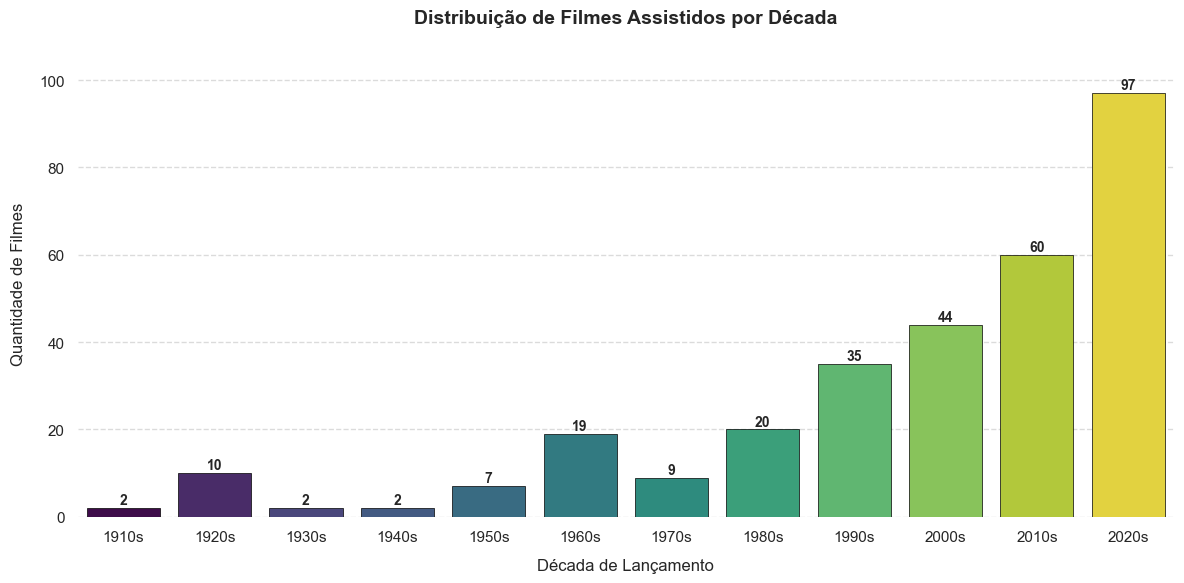

In [23]:
df['Decada'] = (df['Ano'] // 10) * 10

# Contar quantos filmes temos em cada década
filmes_por_decada = df['Decada'].value_counts().sort_index()

# Plotando o gráfico
plt.figure(figsize=(12, 6))

# Versão corrigida do barplot (resolvendo o warning da palette)
ax = sns.barplot(
    x=filmes_por_decada.index.astype(str),  # Convertendo para string para evitar confusão numérica
    y=filmes_por_decada.values,
    hue=filmes_por_decada.index,  # Adicionado para resolver o warning da palette
    palette="viridis",
    edgecolor='black',
    linewidth=0.5,
    dodge=False,  # Evita separação de barras quando usamos hue
    legend=False  # Não mostra a legenda do hue
)

# Adicionando os valores no topo de cada barra
for i, valor in enumerate(filmes_por_decada.values):
    ax.text(
        i, 
        valor + 0.2,
        f'{valor}', 
        ha='center',
        va='bottom',
        fontsize=10,
        fontweight='bold'
    )

# Versão corrigida para rótulos das décadas (resolvendo o warning set_ticklabels)
decadas = [f"{int(decada)}s" for decada in filmes_por_decada.index]
ax.set_xticks(range(len(decadas)))  # Define os ticks primeiro
ax.set_xticklabels(decadas)  # Agora pode definir os labels com segurança

# Melhorando a formatação
plt.title('Distribuição de Filmes Assistidos por Década', pad=20, fontsize=14, fontweight='bold')
plt.xlabel('Década de Lançamento', labelpad=10)
plt.ylabel('Quantidade de Filmes', labelpad=10)
plt.ylim(0, filmes_por_decada.max() * 1.1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

<Figure size 1400x800 with 0 Axes>

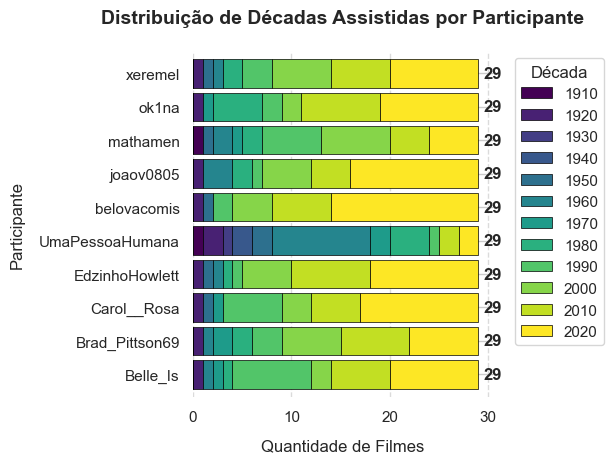


Tabela de Referência (Filmes por Década e Participante):


Década,1910,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010,2020
Assistido por,,,,,,,,,,,,
Belle_Is,0,1,0,0,0,1,1,1,8,2,6,9
Brad_Pittson69,0,1,0,0,0,1,2,2,3,6,7,7
Carol__Rosa,0,1,0,0,1,0,1,0,6,3,5,12
EdzinhoHowlett,0,1,0,0,1,1,0,1,1,5,8,11
UmaPessoaHumana,1,2,1,2,2,10,2,4,1,0,2,2
belovacomis,0,1,0,0,1,0,0,0,2,4,6,15
joaov0805,0,1,0,0,0,3,0,2,1,5,4,13
mathamen,1,0,0,0,1,2,1,2,6,7,4,5
ok1na,0,1,0,0,0,0,1,5,2,2,8,10


In [24]:
# Filtrar participantes que não serão incluídos
participantes_excluidos = ['aNobree', 'Tunim73']
df_filtrado = df[~df['Assistido por'].isin(participantes_excluidos)].copy()

# Criar coluna de década usando .loc
df_filtrado.loc[:, 'Década'] = (df_filtrado['Ano'] // 10) * 10

# Agrupar por participante e década
decadas_por_participante = df_filtrado.groupby(['Assistido por', 'Década']).size().unstack(fill_value=0)

# Configurar o gráfico
plt.figure(figsize=(14, 8))

# Gráfico de barras empilhadas
decadas_por_participante.plot(
    kind='barh',
    stacked=True,
    colormap='viridis',
    edgecolor='black',
    linewidth=0.5,
    width=0.85
)

# Ajustes estéticos
plt.title('Distribuição de Décadas Assistidas por Participante', pad=20, fontsize=14, fontweight='bold')
plt.xlabel('Quantidade de Filmes', labelpad=10)
plt.ylabel('Participante', labelpad=10)
plt.legend(title='Década', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adicionar valores nas barras (versão simplificada)
for i, (idx, row) in enumerate(decadas_por_participante.iterrows()):
    total = row.sum()
    plt.text(total + 0.5, i, f'{total}', va='center', fontweight='bold')

plt.grid(axis='x', linestyle='--', alpha=0.7)
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

# Versão em tabela para referência
print("\nTabela de Referência (Filmes por Década e Participante):")
display(decadas_por_participante.style.background_gradient(cmap='viridis', axis=1))

## 4. Países assistidos

════════════════════════════════════════════════════════════
                     ANÁLISE DE PAÍSES                      
════════════════════════════════════════════════════════════


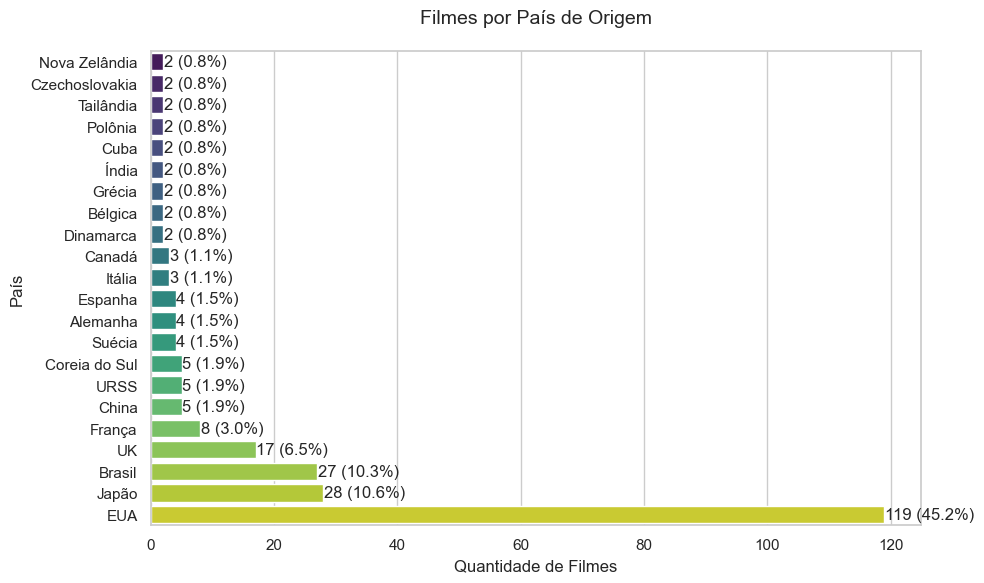


Total de países representados: 35
Países com apenas 1 filme: 13
   Chile, Letônia, Irlanda, Hong Kong, Guiné-Bissau, Argentina, Geórgia, Rússia, Coreia do Norte, Mauritânia, Noruega, Austrália, Iugoslávia


In [25]:
# Análise de países (filmes únicos)
df_paises = df_unicos.assign(País=df_unicos['País'].str.split(', ')).explode('País')
contagem_paises = df_paises['País'].value_counts()

print("═" * 60)
print("ANÁLISE DE PAÍSES".center(60))
print("═" * 60)

# Top países
paises_top = contagem_paises[contagem_paises >= 2]
paises_unicos = contagem_paises[contagem_paises == 1]

df_paises_plot = paises_top.reset_index()
df_paises_plot.columns = ['País', 'Quantidade']
df_paises_plot = df_paises_plot.sort_values('Quantidade', ascending=True)

plt.figure(figsize=(10, 6))
sns.barplot(data=df_paises_plot, x='Quantidade', y='País', hue='País', 
            palette="viridis", dodge=False, legend=False)

# Adicionar valores e porcentagens
total_filmes = contagem_paises.sum()
for i, (pais, qtd) in enumerate(zip(df_paises_plot['País'], df_paises_plot['Quantidade'])):
    porcentagem = (qtd / total_filmes) * 100
    plt.text(qtd + 0.1, i, f"{qtd} ({porcentagem:.1f}%)", va='center')

plt.title('Filmes por País de Origem', fontsize=14, pad=20)
plt.xlabel('Quantidade de Filmes', fontsize=12)
plt.ylabel('País', fontsize=12)
plt.tight_layout()
plt.show()

print(f"\nTotal de países representados: {len(contagem_paises)}")
print(f"Países com apenas 1 filme: {len(paises_unicos)}")
if len(paises_unicos) > 0:
    print("   " + ", ".join(paises_unicos.index.tolist()))

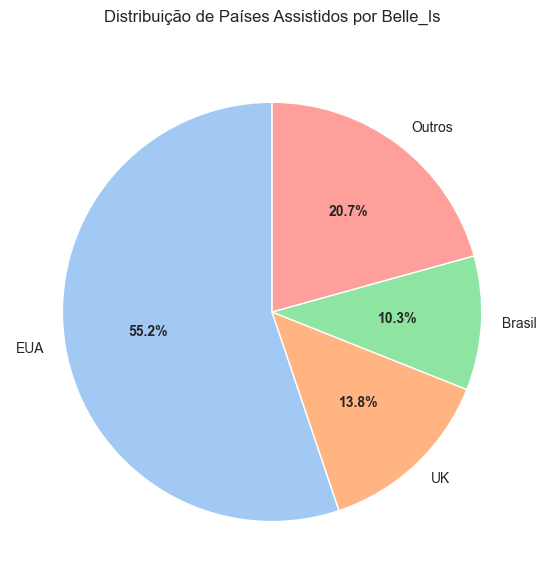


Países assistidos por Belle_Is:
Brasil, Dinamarca, EUA, França, Itália, Japão, Noruega, UK, URSS




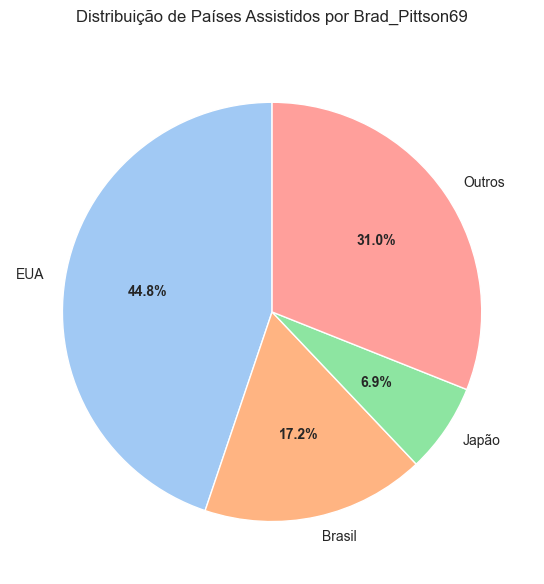


Países assistidos por Brad_Pittson69:
Alemanha, Argentina, Brasil, EUA, Espanha, França, Grécia, Itália, Japão, Polônia, UK, URSS




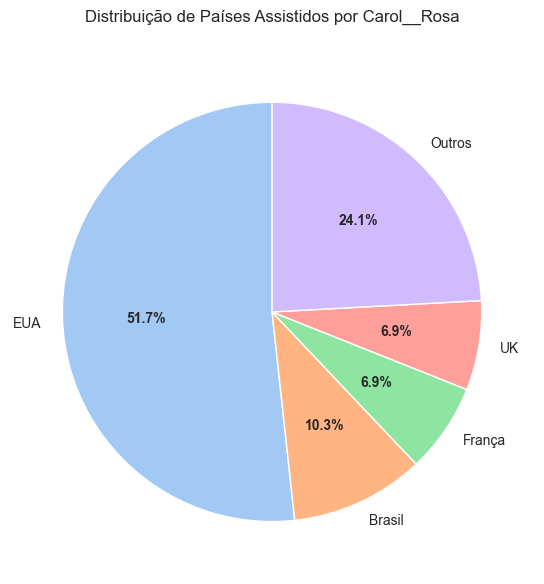


Países assistidos por Carol__Rosa:
Alemanha, Brasil, EUA, Espanha, França, Itália, Japão, UK, URSS, Índia




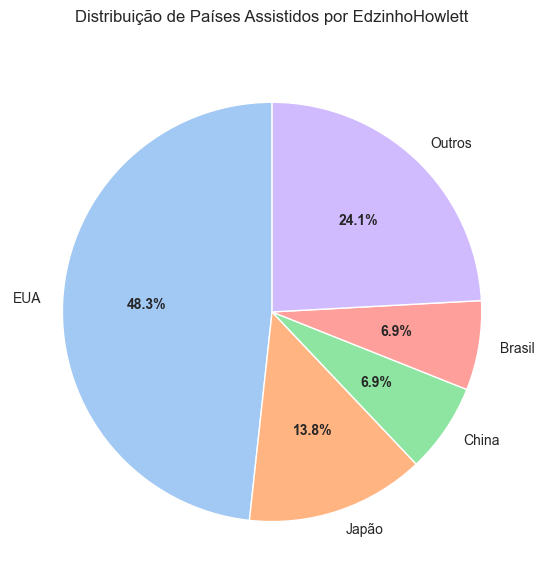


Países assistidos por EdzinhoHowlett:
Alemanha, Brasil, China, EUA, França, Irlanda, Japão, Letônia, Rússia, UK, URSS




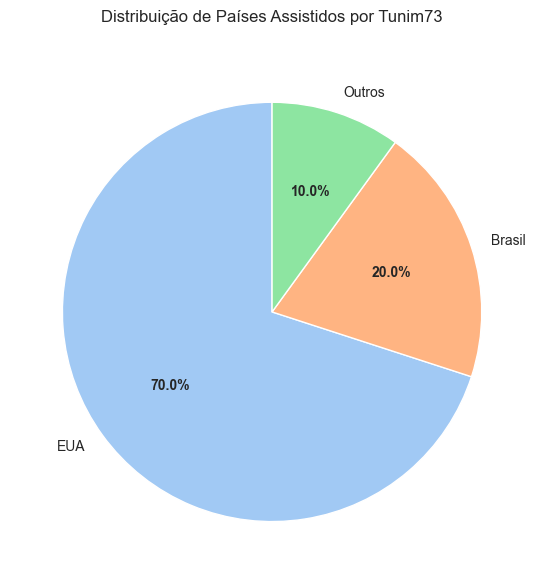


Países assistidos por Tunim73:
Brasil, EUA, UK




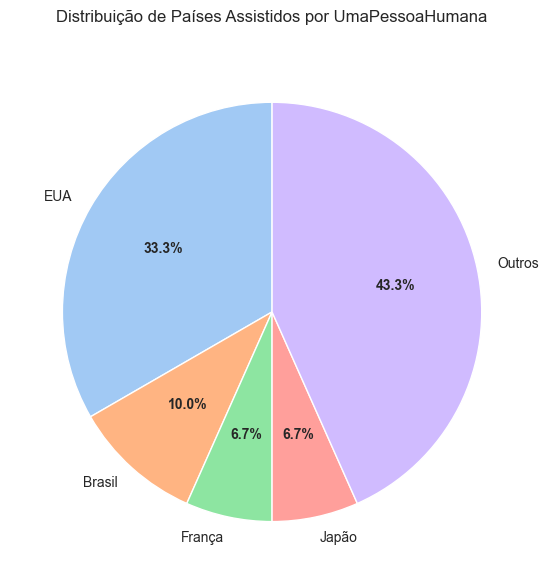


Países assistidos por UmaPessoaHumana:
Alemanha, Austrália, Brasil, Canadá, China, Cuba, Dinamarca, EUA, França, Guiné-Bissau, Japão, Mauritânia, Suécia, URSS




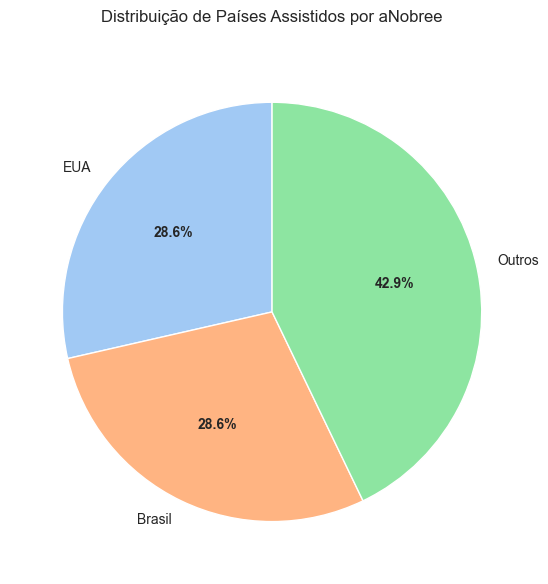


Países assistidos por aNobree:
Brasil, EUA, Itália, Japão, UK




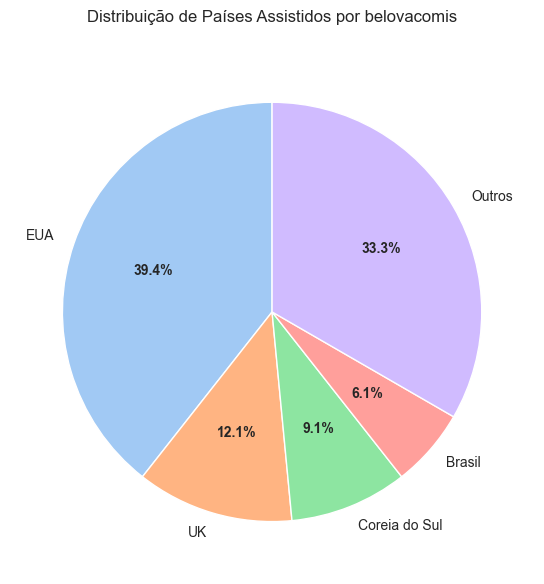


Países assistidos por belovacomis:
Brasil, Canadá, China, Coreia do Sul, EUA, Espanha, França, Geórgia, Japão, Suécia, Tailândia, UK, URSS




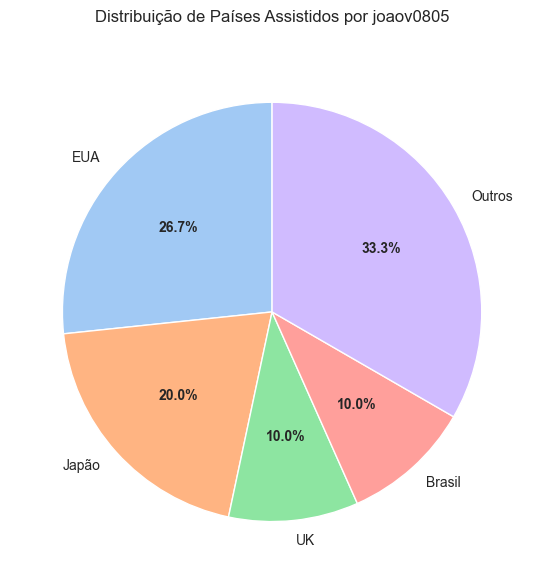


Países assistidos por joaov0805:
Alemanha, Brasil, Bélgica, Chile, Coreia do Sul, Czechoslovakia, Dinamarca, EUA, Grécia, Japão, Suécia, Tailândia, UK, Índia




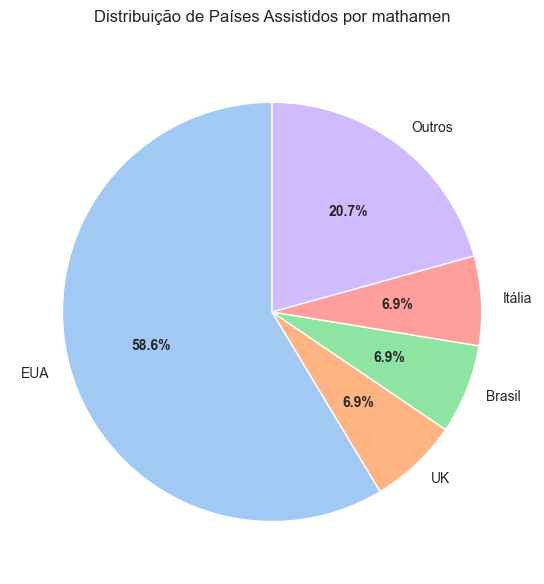


Países assistidos por mathamen:
Alemanha, Brasil, China, Czechoslovakia, EUA, França, Itália, Japão, Suécia, UK




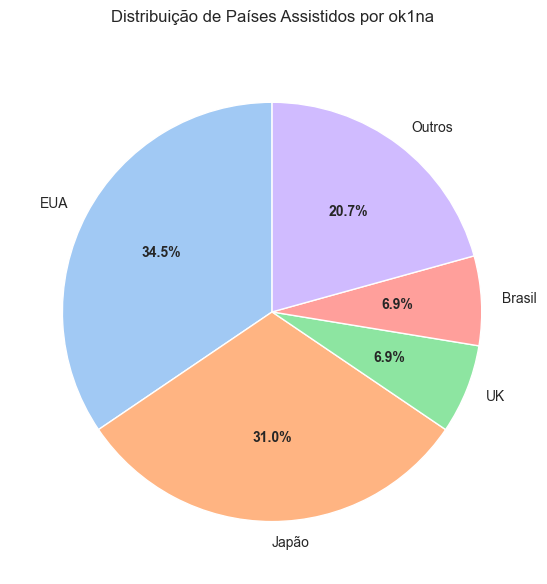


Países assistidos por ok1na:
Brasil, China, Coreia do Norte, EUA, França, Iugoslávia, Japão, Nova Zelândia, Polônia, UK




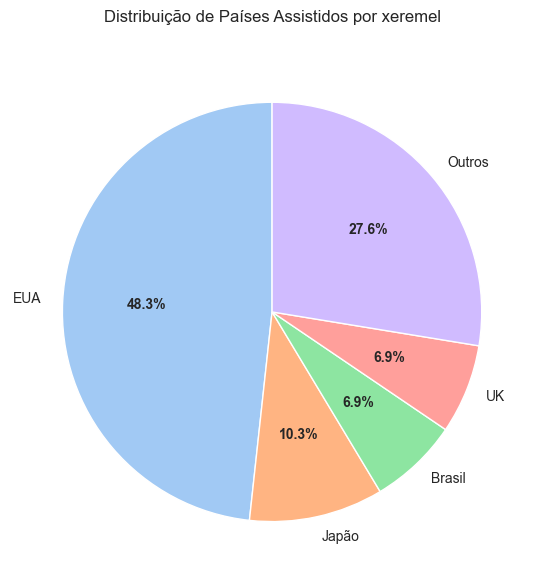


Países assistidos por xeremel:
Brasil, Bélgica, Coreia do Sul, EUA, Espanha, França, Hong Kong, Japão, Letônia, Nova Zelândia, UK, URSS



=== VISÃO CONSOLIDADA ===

Total de filmes por país (todos participantes):
EUA: 139 filmes
Japão: 32 filmes
Brasil: 31 filmes
UK: 23 filmes
França: 12 filmes
China: 8 filmes
URSS: 7 filmes
Alemanha: 6 filmes
Itália: 6 filmes
Coreia do Sul: 5 filmes
Espanha: 4 filmes
Suécia: 4 filmes
Canadá: 3 filmes
Dinamarca: 3 filmes
Czechoslovakia: 2 filmes
Grécia: 2 filmes
Letônia: 2 filmes
Bélgica: 2 filmes
Tailândia: 2 filmes
Nova Zelândia: 2 filmes
Cuba: 2 filmes
Polônia: 2 filmes
Índia: 2 filmes
Guiné-Bissau: 1 filme
Hong Kong: 1 filme
Irlanda: 1 filme
Chile: 1 filme
Coreia do Norte: 1 filme
Rússia: 1 filme
Geórgia: 1 filme
Argentina: 1 filme
Mauritânia: 1 filme
Noruega: 1 filme
Austrália: 1 filme
Iugoslávia: 1 filme

Participantes que assistiram filmes de cada país:
EUA: ok1na, EdzinhoHowlett, UmaPessoaHumana, belovacomis, Tunim73, Carol__Rosa, Belle_Is, a

In [26]:
# Criar DataFrame expandido por país
df_expandido = df.assign(País=df['País'].str.split(', ')).explode('País')

# Agrupar por participante e contar países
paises_por_participante = df_expandido.groupby('Assistido por')['País'].apply(list)

## Função para plotar gráfico de pizza por participante
def plot_paises_participante(participante, paises):
    # Contar ocorrências de cada país
    contagem = Counter(paises)
    paises_top = [p[0] for p in contagem.most_common(4) if p[1] > 1]
    outros = [p for p in contagem if p not in paises_top]
    
    # Preparar dados para o gráfico
    dados = {}
    for p in paises_top:
        dados[p] = contagem[p]
    if outros:
        dados['Outros'] = sum(contagem[p] for p in outros)
    
    # Criar gráfico
    fig, ax = plt.subplots(figsize=(8, 6))
    wedges, texts, autotexts = ax.pie(
        dados.values(),
        labels=dados.keys(),
        autopct='%1.1f%%',
        startangle=90,
        colors=sns.color_palette("pastel"),
        textprops={'fontsize': 10}
    )
    
    # Melhorar legibilidade
    plt.setp(autotexts, size=10, weight="bold")
    ax.set_title(f'Distribuição de Países Assistidos por {participante}', 
                 pad=20, fontsize=12)
    plt.tight_layout()
    plt.show()
    
    # Listar países únicos (para referência)
    print(f"\nPaíses assistidos por {participante}:")
    print(", ".join(sorted(contagem.keys())))

## Gerar gráficos para cada participante
for participante, paises in paises_por_participante.items():
    plot_paises_participante(participante, paises)
    print("\n" + "="*60 + "\n")

## Versão consolidada (todos participantes juntos)
print("\n=== VISÃO CONSOLIDADA ===")
contagem_total = Counter(df_expandido['País'])
print("\nTotal de filmes por país (todos participantes):")
for pais, qtd in contagem_total.most_common():
    print(f"{pais}: {qtd} filme{'s' if qtd > 1 else ''}")

print("\nParticipantes que assistiram filmes de cada país:")
for pais in contagem_total:
    participantes = df_expandido[df_expandido['País'] == pais]['Assistido por'].unique()
    print(f"{pais}: {', '.join(participantes)}")

## 5. Proporção de Animações

════════════════════════════════════════════════════════════
                    ANÁLISE DE ANIMAÇÕES                    
════════════════════════════════════════════════════════════


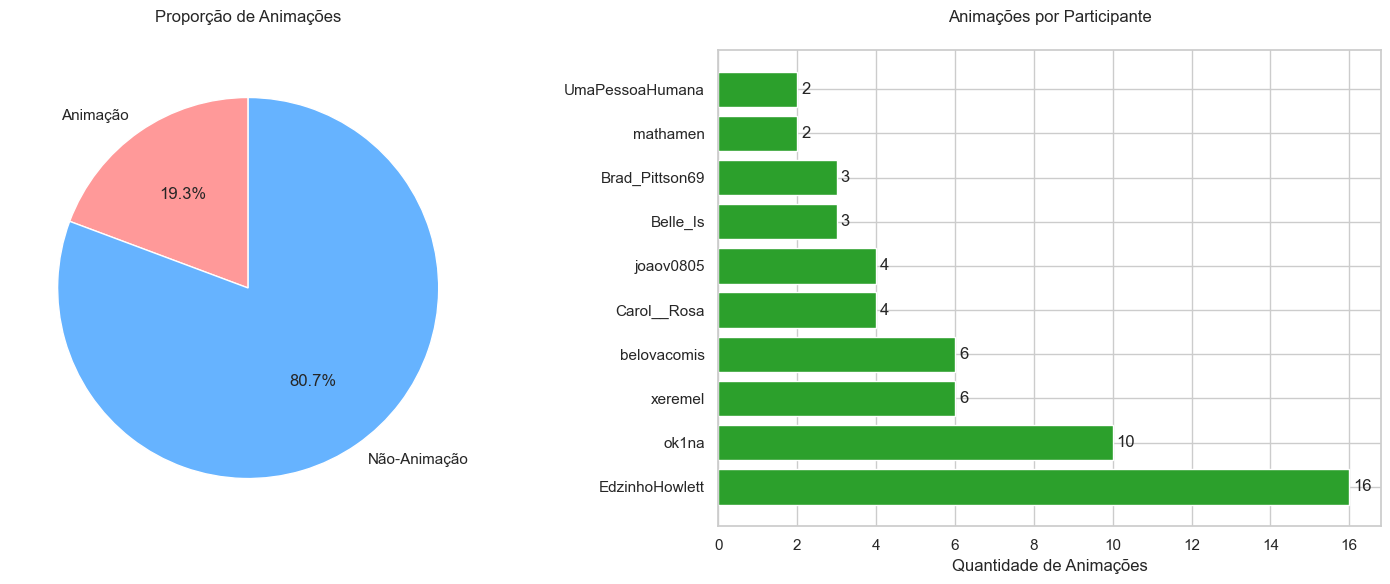

In [27]:
# Análise de animações
total_filmes = len(df_filtrado)
animacoes = df_filtrado['Flag'].sum()
nao_animacoes = total_filmes - animacoes

print("═" * 60)
print("ANÁLISE DE ANIMAÇÕES".center(60))
print("═" * 60)

# Gráfico de pizza
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Proporção geral
labels = ['Animação', 'Não-Animação']
sizes = [animacoes, nao_animacoes]
colors = ['#ff9999', '#66b3ff']

ax1.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
ax1.set_title('Proporção de Animações', pad=20)

# Por participante
animacoes_por_pessoa = df_filtrado[df_filtrado['Flag'] == 1]['Assistido por'].value_counts()
ax2.barh(animacoes_por_pessoa.index, animacoes_por_pessoa.values, color='#2ca02c')

for i, v in enumerate(animacoes_por_pessoa.values):
    ax2.text(v + 0.1, i, str(v), va='center')

ax2.set_title('Animações por Participante', pad=20)
ax2.set_xlabel('Quantidade de Animações')

plt.tight_layout()
plt.show()